# Repaso (Módulo 3)
> Recordar que el tema principal del módulo son las ecuaciones diferenciales. Entonces, al finalizar este módulo, las competencias principales que deben tener ustedes es
> - Resolver de forma numérica ecuaciones diferenciales ordinarias (EDO) de cualquier orden.
> - Graficar soluciones de dichas EDO en diferentes representaciones.
> - Interpretar o concluir acerca de las gráficas que se obtuvieron.

___
## Ejemplo 1. Conejos vs. Ovejas.

Imaginemos que en un mismo ecosistema se encuentran conejos y ovejas. Supongamos, además, que ambas compiten por el mismo alimento (hierba) y que la cantidad total de alimento es limitada. Se ignoran otros factores como depredadores, efectos de temporada (estaciones), y otras fuentes de comida. El modelo de competición entre dos especies **Lotka-Volterra** nos sirve para describir este fenómeno.

Dos fenómenos importantes:
- Cada especie crecería hasta su capacidad máxima en ausencia de la otra especie. Esto se puede modelar con la ecuación logística para cada especie. Los conejos tienen una habilidad soprendente para reproducirse, entonces comparativamente deberían crecer más.
- Cuando conejos y ovejas se encuentran, empieza la competencia. Algunas veces los conejos comen, pero las ovejas (al ser más grandes) ganarán el derecho a la comida la mayoría de las veces. Supondremos que dichos conflictos se dan a una tasa proporcional al tamaño de cada población (si hay dos veces más ovejas, la probabilidad de que un conejo encuentre a una oveja será el doble). Supondremos que dicha competencia disminuirá la tasa de crecimiento para cada especie, y el efecto será mayor para los conejos.

Con las consideraciones anteriores, un modelo específico es:

\begin{align}
\frac{dx_1}{dt} &= x_1(3-x_1-2x_2)\\
\frac{dx_2}{dt} &= x_2(2-x_2-x_1),
\end{align}

donde $x_1(t)\geq 0$ es la población de conejos al instante $t$ y $x_2(t)\geq 0$ es la población de ovejas al instante $t$. Definimos $x=\left[x_1\quad x_2\right]^T$.

Esta selección de coeficientes se tiene para recrear el escenario descrito. Sin embargo, este modelo se puede utilizar para estudiar competición entre especies en general y los coeficientes cambiarán en cada caso.

Simule el sistema para cada una de las siguientes condiciones iniciales. Para cada caso, obtenga gráficas de $x_1$ vs. $t$, $x_2$ vs. $t$ y $x_2$ vs. $x_1$. ¿Qué pasa con las poblaciones de conejos y de ovejas cuando $t\to\infty$? ¿Pueden coexistir?

1. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [0.5 \quad 1]^T$.
2. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 0.5]^T$.
3. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1.5 \quad 1]^T$.
4. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1.5]^T$.
5. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1]^T$.

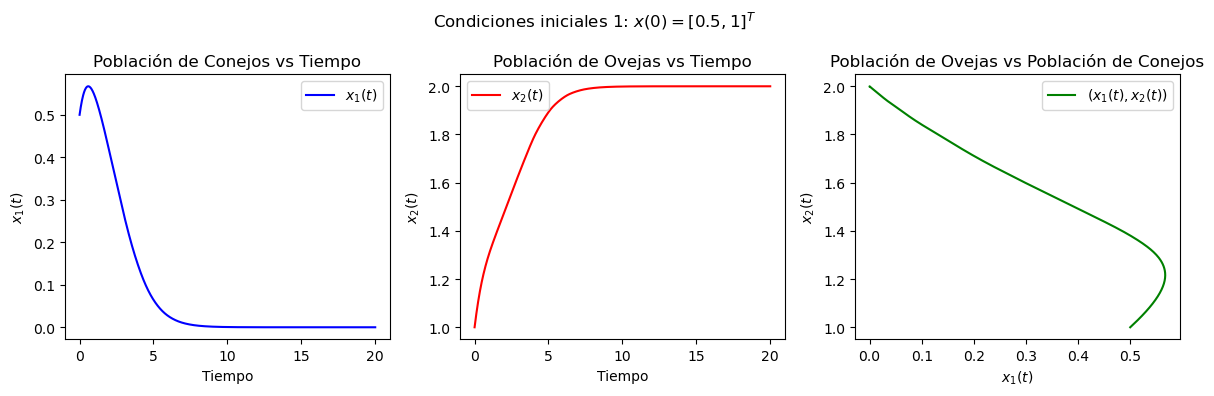

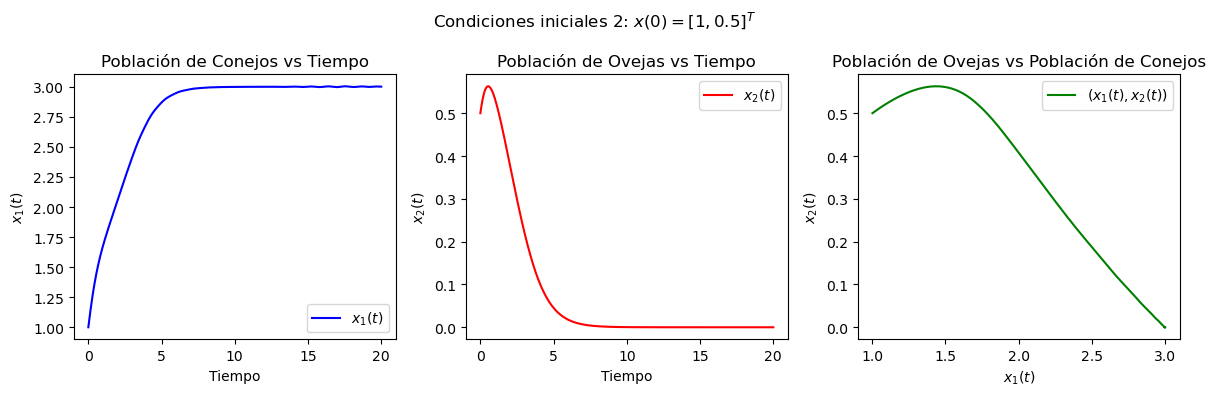

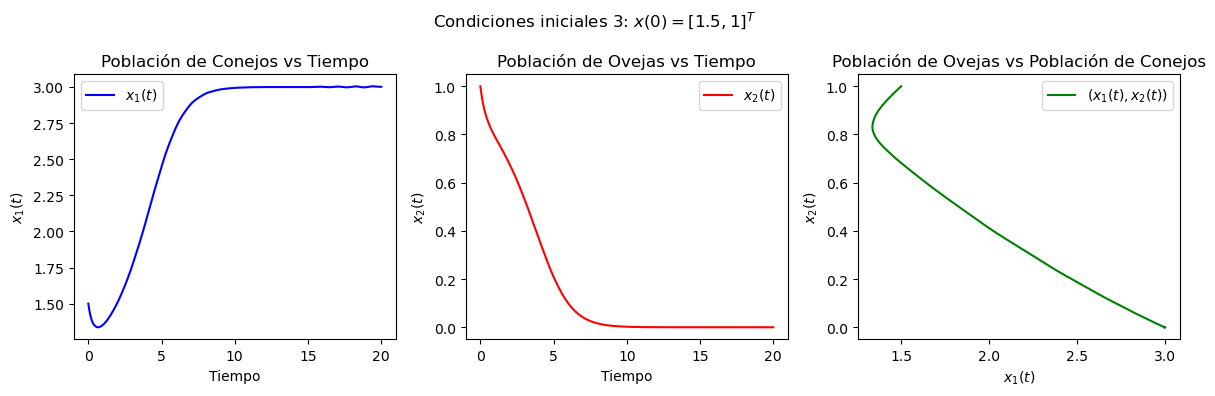

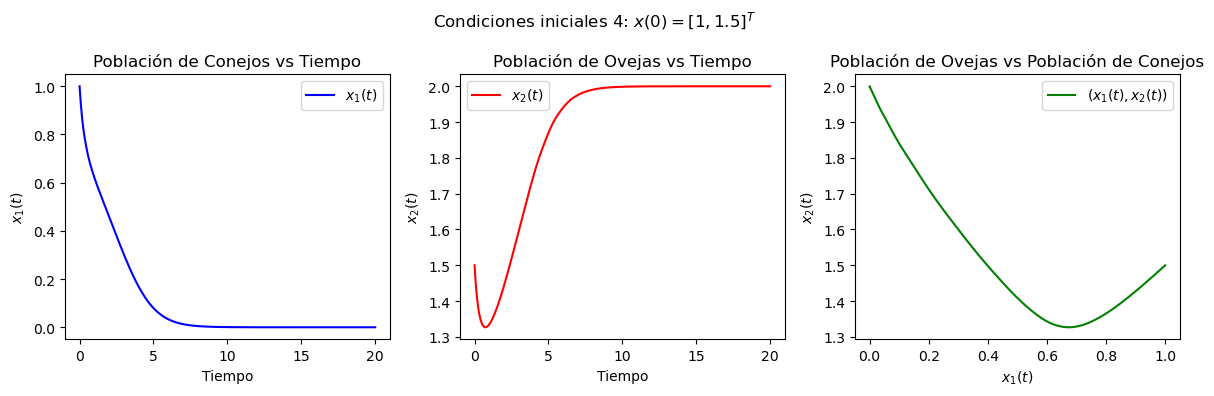

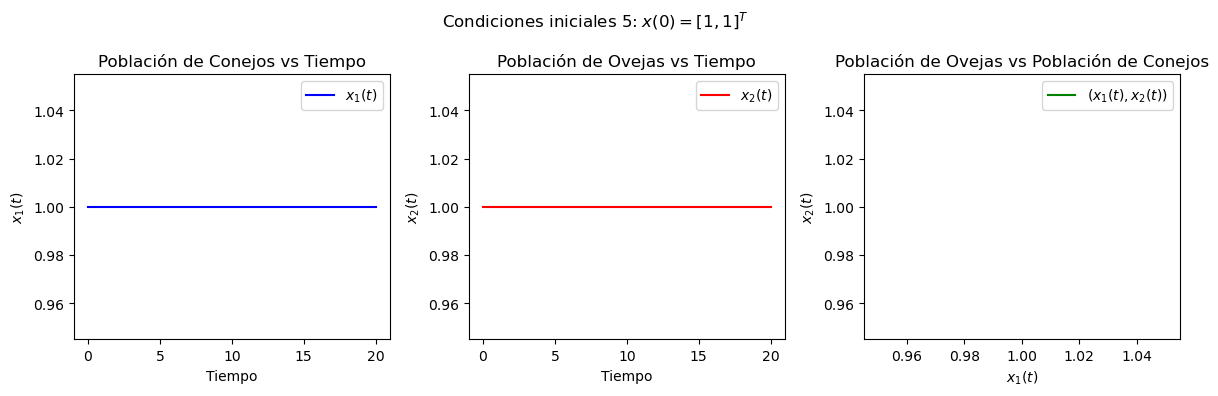

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definición de las ecuaciones diferenciales del modelo Lotka-Volterra
def lotka_volterra(t, x):
    x1, x2 = x
    dx1_dt = x1 * (3 - x1 - 2 * x2)
    dx2_dt = x2 * (2 - x2 - x1)
    return [dx1_dt, dx2_dt]

# Condiciones iniciales
initial_conditions = [[0.5, 1], [1, 0.5], [1.5, 1], [1, 1.5], [1, 1]]

# Simulación y graficación para cada condición inicial
for i, ic in enumerate(initial_conditions):
    t_span = (0, 20)  # Tiempo de simulación
    t_eval = np.linspace(*t_span, 1000)  # Puntos de evaluación

    # Solución de las ecuaciones diferenciales
    sol = solve_ivp(lotka_volterra, t_span, ic, t_eval=t_eval)

    # Graficación
    plt.figure(figsize=(12, 4))

    # Gráfica de x1 vs t
    plt.subplot(1, 3, 1)
    plt.plot(sol.t, sol.y[0], 'b', label='$x_1(t)$')
    plt.xlabel('Tiempo')
    plt.ylabel('$x_1(t)$')
    plt.title('Población de Conejos vs Tiempo')
    plt.legend()

    # Gráfica de x2 vs t
    plt.subplot(1, 3, 2)
    plt.plot(sol.t, sol.y[1], 'r', label='$x_2(t)$')
    plt.xlabel('Tiempo')
    plt.ylabel('$x_2(t)$')
    plt.title('Población de Ovejas vs Tiempo')
    plt.legend()

    # Gráfica de x2 vs x1
    plt.subplot(1, 3, 3)
    plt.plot(sol.y[0], sol.y[1], 'g', label='$(x_1(t), x_2(t))$')
    plt.xlabel('$x_1(t)$')
    plt.ylabel('$x_2(t)$')
    plt.title('Población de Ovejas vs Población de Conejos')
    plt.legend()

    plt.suptitle(f'Condiciones iniciales {i+1}: $x(0)=[{ic[0]}, {ic[1]}]^T$')
    plt.tight_layout()
    plt.show()


**Conclusión:**


Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

## Ejemplo 2

### Primer punto. 
Resolver el siguiente sistema:

\begin{align}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= -0.7 (\frac{dx}{dt})^2 \text{sign}{(\frac{dx}{dt})} - 100 \sin{(x)},
\end{align}


$$ x(0) = \frac{\pi}{3}$$
$$ v(0) = 0$$

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definición de las ecuaciones diferenciales del sistema
def sistema(t, z):
    x, v = z
    dx_dt = v
    dv_dt = -0.7 * (dx_dt)**2 * np.sign(dx_dt) - 100 * np.sin(x)
    return [dx_dt, dv_dt]

# Condiciones iniciales
x0 = np.pi/3  # Posición inicial
v0 = 0        # Velocidad inicial
initial_conditions = [x0, v0]

# Tiempo de simulación
t_span = (0, 20)  # Desde t=0 hasta t=20

# Puntos de evaluación
t_eval = np.linspace(*t_span, 1000)

# Solución de las ecuaciones diferenciales
sol = solve_ivp(sistema, t_span, initial_conditions, t_eval=t_eval)

# Graficación de las soluciones
plt.figure(figsize=(10, 5))



plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

### Segundo punto.
1. Graficar $x$ vs $t$.

Text(0.5, 1.0, 'Posición vs Tiempo')

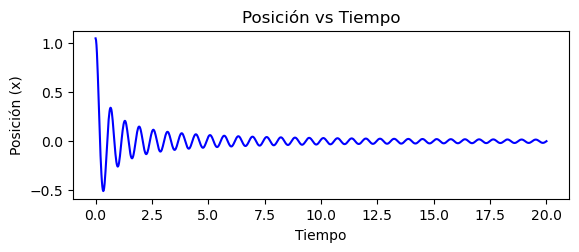

In [5]:
# Gráfica de x vs t
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'b')
plt.xlabel('Tiempo')
plt.ylabel('Posición (x)')
plt.title('Posición vs Tiempo')


2. Graficar $t$ vs $v$.

Text(0.5, 1.0, 'Velocidad vs Tiempo')

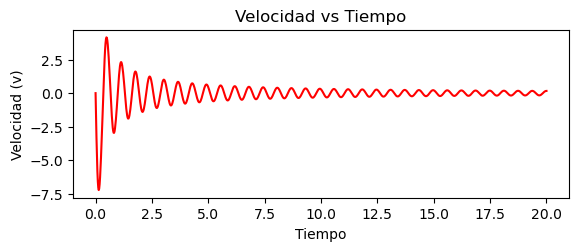

In [10]:
# Gráfica de v vs t
plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[1], 'r')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad (v)')
plt.title('Velocidad vs Tiempo')


3. Graficar $x$ vs $v$.

Text(0.5, 1.0, 'Velocidad vs Posición')

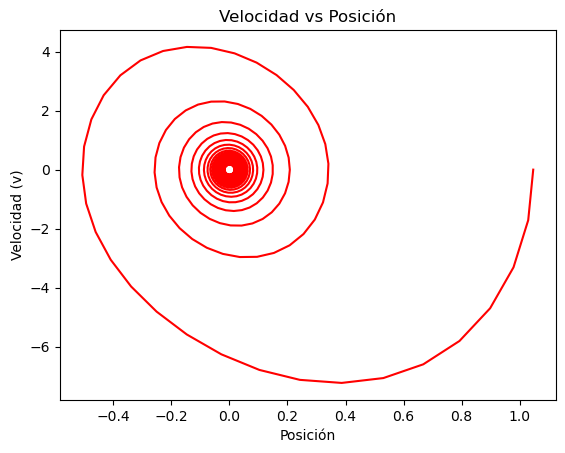

In [9]:
# Gráfica de v vs x
plt.plot(sol.y[0], sol.y[1], 'r')
plt.xlabel('Posición')
plt.ylabel('Velocidad (v)')
plt.title('Velocidad vs Posición')

## Ejemplo 3

¿Qué es una ecuación diferencial?

Una ecuación diferencial es una ecuación que involucra una función desconocida y una o más de sus derivadas. Describe cómo cambia una función en relación con una o más de sus variables independientes.

¿Qué es la solución de una ecuación diferencial?

La solución de una ecuación diferencial es una función que satisface la ecuación junto con ciertas condiciones adicionales, como las condiciones iniciales o las condiciones de contorno.

¿Qué es una condición inicial? ¿Por qué se necesita para poder resolver numéricamente una ecuación diferencial de primer orden?

Una condición inicial es una restricción que se impone a la función desconocida y sus derivadas en un punto particular del dominio. Se necesita para resolver numéricamente una ecuación diferencial de primer orden porque especifica la posición inicial del problema y proporciona suficiente información para determinar una solución única.

Si tuviera un sistema de 3 ecuaciones diferenciales con 3 variables diferentes, ¿cuántas condiciones iniciales se necesitan? ¿Por qué?

Si tuviera un sistema de 3 ecuaciones diferenciales con 3 variables diferentes, se necesitarían 3 condiciones iniciales, una para cada variable. Esto se debe a que cada ecuación diferencial de primer orden en el sistema necesita una condición inicial para determinar una solución única.

¿Cuál es la diferencia entre los siguientes tipos de errores?
- Norma del error
- Error cuadrático medio
- Integral del error cuadrático


La diferencia entre los tipos de errores es:  
La norma del error es una medida de la magnitud del error entre la solución aproximada y la solución exacta de una ecuación diferencial. Puede calcularse utilizando diversas normas, como la norma Euclidiana.  
El error cuadrático medio es el promedio de los cuadrados de los errores individuales entre la solución aproximada y la solución exacta. Es una medida de la precisión global de la aproximación.  
La integral del error cuadrático es la integral del cuadrado del error entre la solución aproximada y la solución exacta a lo largo de un intervalo dado. Representa la acumulación total del error a lo largo de ese intervalo.  